<a href="https://colab.research.google.com/github/Christer-L/T-mixer/blob/master/rheometer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Rheology lab class I
Original code by Lucas P.\
Modified by Christer L. and Goce K.

## I. Load data from Google Drive and set working directories.

In [1]:
%cd ..
# Load the Drive helper and mount
from google.colab import drive
import os
drive.mount('/content/drive/', force_remount=True)
path = "content/drive/My Drive/IPGG/Rheology"
os.chdir(path)
os.getcwd()

# Set file paths and define repositories with image data
root=r'./'
folder=[r'solution_45water_55glycerol', r'solution_55water_45glycerol',
        r'solution_75water_25glycerol']
depth_k = len(folder)



/
Mounted at /content/drive/


## II. Import dependencies

In [2]:
import numpy as np
import os
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from scipy.special import erf
import cv2
from sklearn.linear_model import LinearRegression

## III. Define error function

In [8]:
def error(x,A,B,xc,dx):
    return(A * erf((x - xc)/dx) + B)

## IV. Plot graphs

solution_45water_55glycerol
Channel width in pixels: 358
interface position: 200.12674058524837 for ['x20', 'Qref=100', 'Qtest=20', '4.png']
interface position: 213.1882004096165 for ['x20', 'Qref=100', 'Qtest=15', '2.png']
interface position: 204.5648141007706 for ['x20', 'Qref=100', 'Qtest=18', '3.png']
interface position: 195.06890302250594 for ['x20', 'Qref=100', 'Qtest=22', '5.png']
interface position: 190.9274303458017 for ['x20', 'Qref=100', 'Qtest=24', '6.png']
interface position: 187.51777518408286 for ['x20', 'Qref=100', 'Qtest=26', '7.png']
interface position: 184.19505442855763 for ['x20', 'Qref=100', 'Qtest=28', '8.png']
interface position: 180.65072145946291 for ['x20', 'Qref=100', 'Qtest=30', '9.png']
interface position: 174.64309161653313 for ['x20', 'Qref=100', 'Qtest=34', '11.png']
interface position: 177.43673500409787 for ['x20', 'Qref=100', 'Qtest=32', '10.png']
interface position: 171.60780754568543 for ['x20', 'Qref=100', 'Qtest=36', '12.png']
interface position:

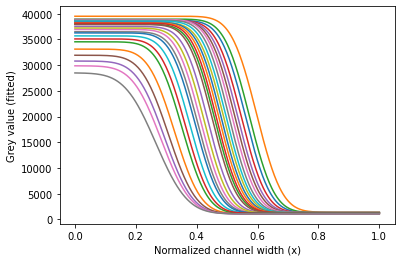

slope: [0.93438547]
intercept: 0.7526147703385735


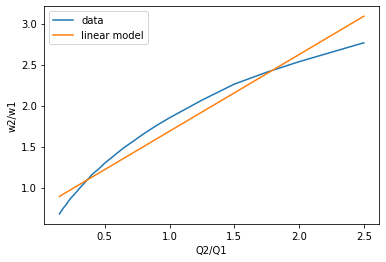

Q2/Q1 = 0.26475714668656747 @ w2/w1 = 1
solution_55water_45glycerol
Channel width in pixels: 357
interface position: 180.46560880449698 for ['x20', 'Qref=50', 'Qtest=20', '4.png']
interface position: 227.46481574877086 for ['x20', 'Qref=50', 'Qtest=08', '22.png']
interface position: 138.73568206028884 for ['x20', 'Qref=50', 'Qtest=45', '12.png']
interface position: 167.204452339545 for ['x20', 'Qref=50', 'Qtest=26', '7.png']
interface position: 91.86199164536688 for ['x20', 'Qref=50', 'Qtest=150', '19.png']
interface position: 247.640097579094 for ['x20', 'Qref=50', 'Qtest=05', '1.png']
interface position: 85.08749654452949 for ['x20', 'Qref=50', 'Qtest=200', '23.png']
interface position: 104.66452490675809 for ['x20', 'Qref=50', 'Qtest=100', '17.png']
interface position: 97.5566777850266 for ['x20', 'Qref=50', 'Qtest=125', '18.png']
interface position: 118.53285420067274 for ['x20', 'Qref=50', 'Qtest=70', '15.png']
interface position: 144.79422185472006 for ['x20', 'Qref=50', 'Qtest=4

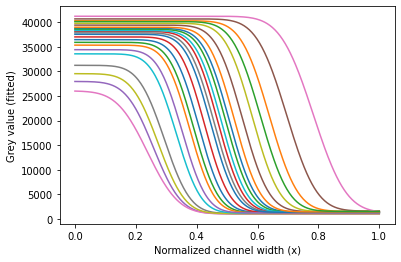

slope: [0.74936736]
intercept: 0.6830235803572504


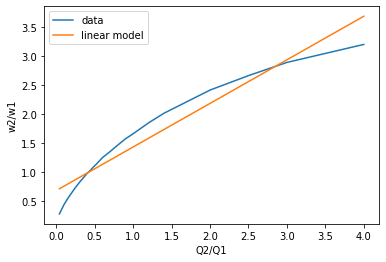

Q2/Q1 = 0.4229920277791315 @ w2/w1 = 1
solution_75water_25glycerol
Channel width in pixels: 357
interface position: 300.4594728918609 for ['x20', 'Qref=50', 'Qtest=02', '24.png']
interface position: 180.71497091709642 for ['x20', 'Qref=50', 'Qtest=30', '5.png']
interface position: 178.23698905007214 for ['x20', 'Qref=50', 'Qtest=32', '25.png']
interface position: 192.79307396878215 for ['x20', 'Qref=50', 'Qtest=25', '4.png']
interface position: 169.64028820436891 for ['x20', 'Qref=50', 'Qtest=38', '26.png']
interface position: 172.24706356293038 for ['x20', 'Qref=50', 'Qtest=35', '6.png']
interface position: 267.65265124440833 for ['x20', 'Qref=50', 'Qtest=05', '22.png']
interface position: 206.24342386318892 for ['x20', 'Qref=50', 'Qtest=20', '3.png']
interface position: 102.96915484879077 for ['x20', 'Qref=50', 'Qtest=200', '21.png']
interface position: 110.61401893972968 for ['x20', 'Qref=50', 'Qtest=140', '19.png']
interface position: 115.90877105416624 for ['x20', 'Qref=50', 'Qtes

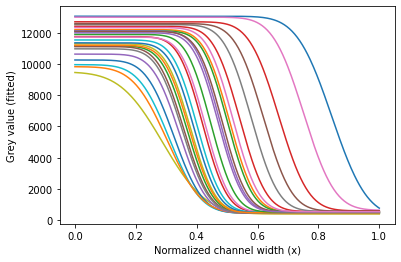

slope: [0.58820399]
intercept: 0.60913028350564


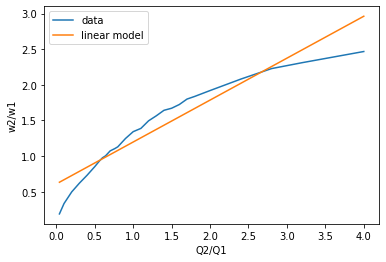

Q2/Q1 = 0.664513886730482 @ w2/w1 = 1


In [9]:
# TODO: Fix magic numbers

# Iterate through repositories
for k in range(depth_k):
    path_k=root+folder[k]
    print(folder[k])

    # Obtain resized images
    list_img=os.listdir(path_k+'/resized')

    depth_j=len(list_img)-1
    Q_ratios = []
    w_ratios = []

    # Find the background image and get spatial parameters
    for j in range(depth_j):
        j=j+1
        data_flow = list_img[j].split("_")
        if "background" in data_flow:
          path_current=path_k+'/resized/'+list_img[j]
          background = cv2.imread(path_current,-1)
          back_partial = background[:,1300:1350]
          line=np.mean(back_partial,axis=1)
          
          line1 = line[:int(len(line)/2)]
          line2 = line[int(len(line)/2):]
          
          wall1 = np.where(line1==min(line1))[0][0]
          wall2 = np.where(line2==min(line2))[0][0] + int(len(line)/2)
          channel_width_in_px = wall2 - wall1
          print("Channel width in pixels: " + str(channel_width_in_px))         
    
    # Iterate through each image
    for j in range(depth_j):
        j=j+1
        # Get image information from filename
        data_flow = list_img[j].split("_")
        if "background" in data_flow:
          continue

        # Opening the images and extracting a small portion 
        path_current=path_k+'/resized/'+list_img[j]
        img=cv2.imread(path_current,-1)
        img_partial = img[wall1:wall2,1300:1350]


        if "background" not in data_flow:
          ratio = float(data_flow[2][6:]) / float(data_flow[1][5:])
          Q_ratios.append(ratio)
        
        # Extracting the grey level perpendicular to the channel direction
        #line=img_partial[:,0]
        line=np.mean(img_partial,axis=1)
        line=np.array(line).astype('uint')
        index = np.where(line==max(line))[0][0]
        plateu = np.linspace(max(line), max(line),index).astype('uint')
        line = np.concatenate([plateu, line[index:]])
        
        x = np.linspace(0, channel_width_in_px - 1, 
                        channel_width_in_px).astype('uint')

        # Fitting the curve with the error function
        (A,B,xc,dx), pcov = curve_fit(error,x,line,p0=(5000,5000,index,channel_width_in_px), maxfev=10000)
        y = error(x,A,B,xc,dx)
        normalized_x = np.linspace(0, 1, len(x))
        plt.plot(normalized_x, y, label=str(data_flow))
        if data_flow[1] != "background.png":
          w_ratios.append((channel_width_in_px - xc) / xc)
          print("interface position: " + str(xc) + " for " + str(data_flow))
    
    # Show all curves on the same plot
    plt.xlabel("Normalized channel width (x)")
    plt.ylabel("Grey value (fitted)")
    plt.show()

    # Sort values by Q2/Q1
    zipped_list = zip(Q_ratios, w_ratios)
    x,y = zip(*sorted(zipped_list))
    plt.plot(x,y, label="data")
    plt.xlabel("Q2/Q1")
    plt.ylabel("w2/w1")

    # Fit data to linear function
    x = np.array(x).reshape((-1, 1))
    y = np.array(y)
    model = LinearRegression()
    model.fit(x,y)
    print('slope:', model.coef_)
    print('intercept:', model.intercept_)

    plt.plot(x, x*model.coef_[0] + model.intercept_, label="linear model")
    plt.legend(loc="upper left")
    plt.show()

    # Calculate Q2/Q1 value @ w2/w1. Y = AX + B --> X = (Y-B)/A --> X = (1-B)/A
    print("Q2/Q1 = " + str((1 - model.intercept_) / model.coef_[0]) + " @ w2/w1 = 1")
    

## Additional: Inspect how (A + B)/(A - B) value changes as n increases



-1.0000050814698722
0.29592698107218773
100000.06724402614


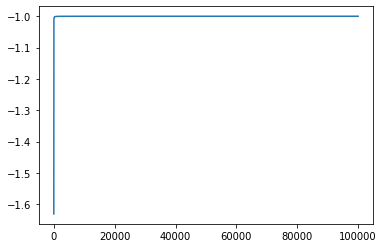

In [10]:
x = []
y = []
b = 0
a = 0
for n in range(1,100001):
  x.append(n)
  b = b + 1/np.tanh(n*np.pi/ 1.8181818)
  a = a + (48/(np.pi**5 * n**5)) * (1-(-1)**n) * np.tanh(n*np.pi/ 1.8181818)
  A = 1/2 - (1/1.1) * a
  B = (1/1.1) * b
  y.append((A+B)/(A-B))

plt.plot(x,y)
print((A+B)/(A-B))
print(a)
print(b)


